In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import kagglehub
    
# Download latest version
path = kagglehub.dataset_download("eslamelsolya/laptop-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\104662728\.cache\kagglehub\datasets\eslamelsolya\laptop-price-prediction\versions\1


In [3]:
df =pd.read_csv(r"C:\Users\104662728\.cache\kagglehub\datasets\eslamelsolya\laptop-price-prediction\versions\1\laptop_data.csv",index_col=['Unnamed: 0'])

In [4]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [6]:
df.shape

(1303, 11)

In [7]:
# Checking format
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 122.2+ KB


In [8]:
# Checking null values 
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
# Fixing typos & inconsistencies
# Ram, Memory,
df['Ram'].str.replace('GB','').value_counts()

Ram
8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

In [10]:
df['Ram'] = df['Ram'].str.replace('GB','')

In [11]:
df['Memory']= df['Memory'].str.upper().str.strip()
df['Memory'].value_counts(dropna=False)

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB FLASH STORAGE                38
2TB HDD                           16
64GB FLASH STORAGE                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB HYBRID                       9
256GB FLASH STORAGE                8
16GB FLASH STORAGE                 7
32GB SSD                           6
180GB SSD                          5
128GB FLASH STORAGE                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB FLASH STORAGE                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [12]:

Memory_dict ={
'256GB SSD':'256',
'1TB HDD':'1000',
'500GB HDD':'500',
'512GB SSD':'512',
'128GB SSD':'128',
'128GB SSD':'128',
'256GB SSD +  1TB HDD':'1256',
'32GB FLASH STORAGE':'32',
'2TB HDD ':'2000',
'64GB FLASH STORAGE':'64',
'512GB SSD +  1TB HDD':'1512',
'1TB SSD':'1000',
'256GB SSD +  2TB HDD':'2256',
'1.0TB HYBRID':'1000',
'256GB FLASH STORAGE':'256',
'16GB FLASH STORAGE':'16',
'32GB SSD':'32',
'180GB SSD':'180',
'128GB FLASH STORAGE':'128',
'512GB SSD +  2TB HDD':'2512',
'16GB SSD':'16',
'512GB FLASH STORAGE':'512',
'1TB SSD +  1TB HDD':'2000',
'256GB SSD +  500GB HDD':'756',
'128GB SSD +  2TB HDD':'2128',
'256GB SSD +  256GB SSD':'512',
'512GB SSD +  256GB SSD':'768',
'512GB SSD +  512GB SSD':'1024',
'64GB FLASH STORAGE +  1TB HD':'1064',
'1TB HDD +  1TB HDD':'2000',
'32GB HDD':'32',
'64GB SSD':'64',
'128GB HDD':'128',
'240GB SSD':'240',
'8GB SSD':'8',
'508GB HYBRID ':'508',
'1.0TB HDD':'1000',
'512GB SSD +  1.0TB HYBRID':'1512',
'256GB SSD +  1.0TB HYBRID':'1256',
'128GB SSD +  1TB HDD':'1128', 
'2TB HDD':'2000', 
'64GB Flash Storage +  1TB HDD':'1064',
'508GB Hybrid':'508',
'32GB Flash Storage' :'32',     
'64GB Flash Storage':'64',           
'1.0TB Hybrid':'1000',                 
'256GB Flash Storage':'256'    ,      
'16GB Flash Storage':'16',            
'128GB Flash Storage':'128',         
'512GB Flash Storage':'512' ,         
'512GB SSD +  1.0TB Hybrid':'1512'   ,
'256GB SSD +  1.0TB Hybrid':'1256',
'64GB FLASH STORAGE +  1TB HDD':'1064',
'508GB HYBRID':'508'   
}
df['Memory'] = df['Memory'].map(Memory_dict)

In [13]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [14]:
df['Ram']=df['Ram'].astype(int)
df['Memory']=df['Memory'].astype(float)

In [15]:
df['Weight']=df['Weight'].str.lower().str.strip().str.replace('kg','').astype(float)

In [16]:
import re

def map_resolution_and_calculate_pixels(resolution):
    # Define categories and their matching keywords (if you still want them)
    resolution_keywords = {
        'Full HD': ['1920x1080', 'IPS Panel Full HD', 'Full HD'],
        'Quad HD': ['2560x1440', 'Quad HD', 'IPS Panel Quad HD'],
        '4K': ['3840x2160', '4K Ultra HD'],
        'Touchscreen': ['Touchscreen'],
        'HD': ['1366x768', '1600x900'],
        'Other': []  # Will catch anything that doesn't fit above
    }
    
    # Extract width and height from the resolution string using regex
    match = re.search(r'(\d+)(x)(\d+)', resolution)
    
    if match:
        width = int(match.group(1))
        height = int(match.group(3))
        total_pixels = width * height
    else:
        # If resolution format doesn't match, default to 0 pixels
        total_pixels = 0
    
    return total_pixels

In [17]:
df['Total_resolution'] = df['ScreenResolution'].apply(map_resolution_and_calculate_pixels)

In [18]:
def map_resolution_to_category(resolution):
    # Define categories and their matching keywords
    resolution_keywords = {
        'Full HD': ['1920x1080', 'IPS Panel Full HD', 'Full HD'],
        'HD': ['1366x768', '1600x900'],
        'Other_Resolution': [    # Grouping less frequent resolutions together
            '2560x1440',          # Quad HD
            'Quad HD',            # Quad HD
            '3840x2160',          # 4K
            '4K Ultra HD',        # 4K
            'Touchscreen',        # Touchscreen
            'Other'               # Catch-all for anything else
        ]
    }
    
    # Loop through the categories and check if any keywords are in the resolution string
    for category, keywords in resolution_keywords.items():
        if any(keyword in resolution for keyword in keywords):
            return category
    
    # Return 'Other_Resolution' as the default if no category matches
    return 'Other_Resolution'

In [19]:
df['ScreenResolution'] = df['ScreenResolution'].apply(map_resolution_to_category)

In [20]:
df['Cpu'].value_counts(normalize=True).head()

Cpu
Intel Core i5 7200U 2.5GHz     0.145817
Intel Core i7 7700HQ 2.8GHz    0.112049
Intel Core i7 7500U 2.7GHz     0.102840
Intel Core i7 8550U 1.8GHz     0.056025
Intel Core i5 8250U 1.6GHz     0.055257
Name: proportion, dtype: float64

In [21]:
df['Cpu'] =np.where(
    df['Cpu'].str.contains('Intel Core i7') | df['Cpu'].str.contains('Intel Core i5'),
    np.where(df['Cpu'].str.contains('Intel Core i7'), 'Intel_i7', 'Intel_i5'),
    'Cpu_Other'
)

In [22]:
 df['Gpu'] =  df['Gpu'].str.lower().str.strip()
df['Gpu'].value_counts(normalize=True).head()

Gpu
intel hd graphics 620      0.216424
intel hd graphics 520      0.141980
intel uhd graphics 620     0.052187
nvidia geforce gtx 1050    0.050652
nvidia geforce gtx 1060    0.036838
Name: proportion, dtype: float64

In [23]:
df['Gpu'] = np.where(
    df['Gpu'].str.contains('intel'), 'Intel',
    np.where(df['Gpu'].str.contains('nvidia'), 'Nvidia', 'Gpu_Other')
)


In [24]:
df['Gpu'].value_counts()

Gpu
Intel        722
Nvidia       400
Gpu_Other    181
Name: count, dtype: int64

In [25]:
df['TypeName'] = df['TypeName'].str.lower().str.strip()
df['TypeName'].value_counts()

TypeName
notebook              727
gaming                205
ultrabook             196
2 in 1 convertible    121
workstation            29
netbook                25
Name: count, dtype: int64

In [26]:
df['TypeName'].value_counts()

TypeName
notebook              727
gaming                205
ultrabook             196
2 in 1 convertible    121
workstation            29
netbook                25
Name: count, dtype: int64

In [27]:
df[df.duplicated(keep=False)]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Total_resolution
1172,Asus,notebook,15.6,HD,Cpu_Other,4,500.0,Intel,Windows 10,2.20,19660.3200,1049088
1261,Asus,ultrabook,13.3,Full HD,Cpu_Other,8,512.0,Intel,Windows 10,1.20,38841.1200,2073600
1262,Dell,notebook,15.6,HD,Cpu_Other,6,1000.0,Intel,Windows 10,2.30,24455.5200,1049088
1263,Acer,notebook,15.6,HD,Cpu_Other,4,500.0,Intel,Linux,2.40,15397.9200,1049088
1264,Dell,notebook,15.6,HD,Cpu_Other,2,500.0,Intel,Windows 10,2.20,20193.1200,1049088
1265,Lenovo,notebook,15.6,Full HD,Intel_i7,8,1000.0,Nvidia,Windows 10,2.60,47898.7200,2073600
1266,HP,notebook,15.6,Full HD,Cpu_Other,6,1000.0,Gpu_Other,Windows 10,2.04,29303.4672,2073600
1267,Dell,notebook,15.6,HD,Intel_i7,8,1000.0,Gpu_Other,Linux,2.30,42943.1472,1049088
1268,HP,netbook,11.6,HD,Cpu_Other,2,32.0,Intel,Windows 10,1.17,11135.5200,1049088
1269,Asus,notebook,15.6,HD,Intel_i7,4,500.0,Nvidia,Windows 10,2.20,38378.6496,1049088


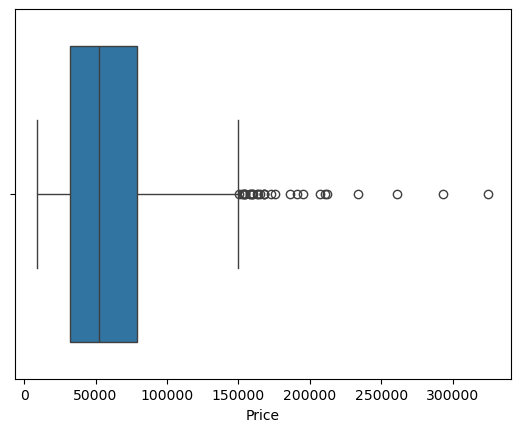

In [28]:
# Checking Outliers with Domain expertise and experts
sns.boxplot(x=df['Price']);

In [29]:
df[df['Price']>250000]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Total_resolution
196,Razer,gaming,17.3,Other_Resolution,Intel_i7,32,1000.0,Nvidia,Windows 10,3.49,324954.72,8294400
610,Lenovo,notebook,15.6,Other_Resolution,Cpu_Other,32,1000.0,Nvidia,Windows 10,2.50,261018.72,8294400
830,Razer,gaming,17.3,Other_Resolution,Intel_i7,32,512.0,Nvidia,Windows 10,3.49,292986.72,8294400


* Razer gaming 17.3 inches intel i7 ram 32 gpu nvidia
 link: https://www.amazon.com/Razer-Blade-Gaming-Laptop-2021/dp/B08SJJ8H7Z?th=1
* Prices look off BUT we're gonna pretend they are ok for Training purposes

# Exploratory Data Analysis

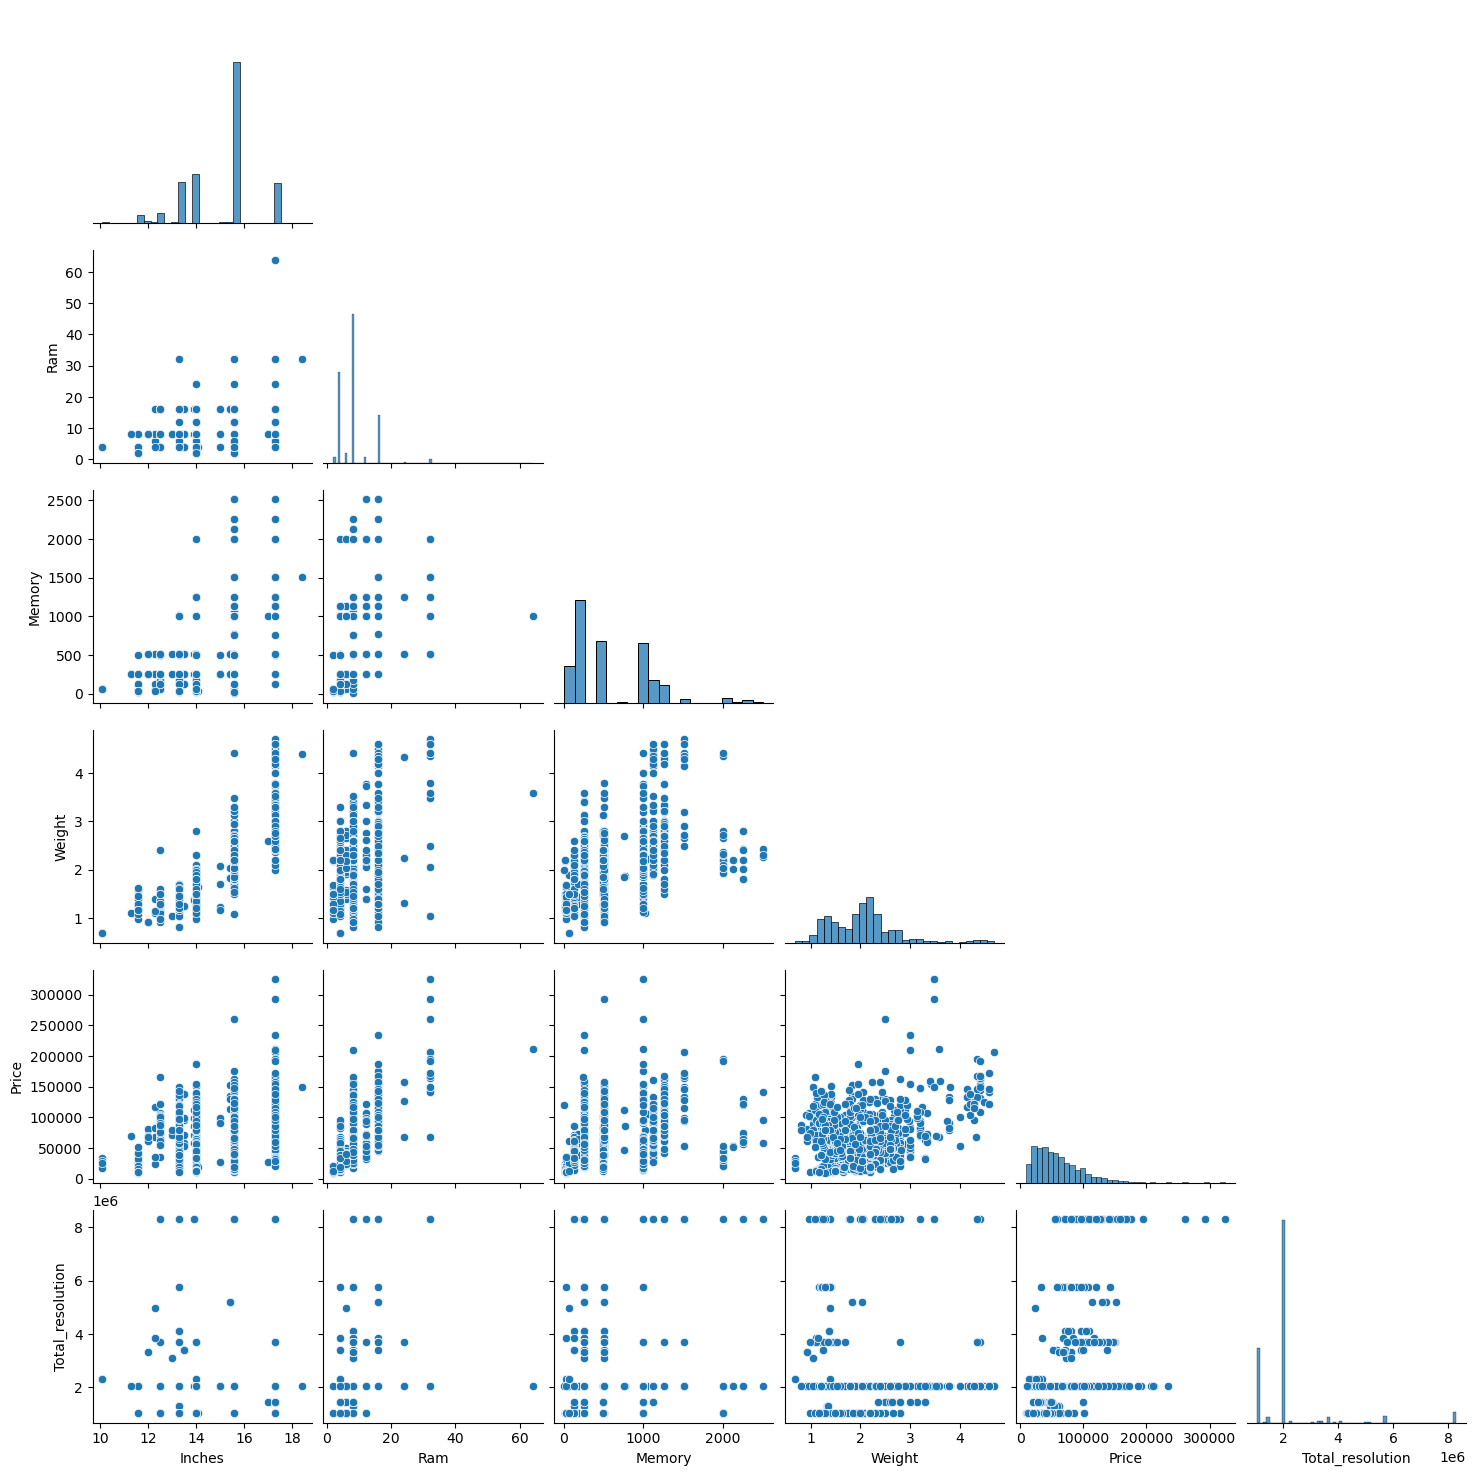

In [30]:
sns.pairplot(df,corner=True);

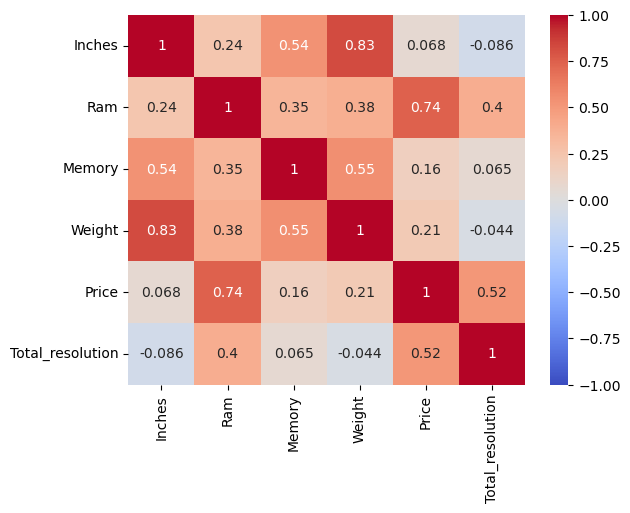

In [31]:
sns.heatmap(df.corr(numeric_only=True),vmax=1,vmin=-1,annot=True,cmap='coolwarm');

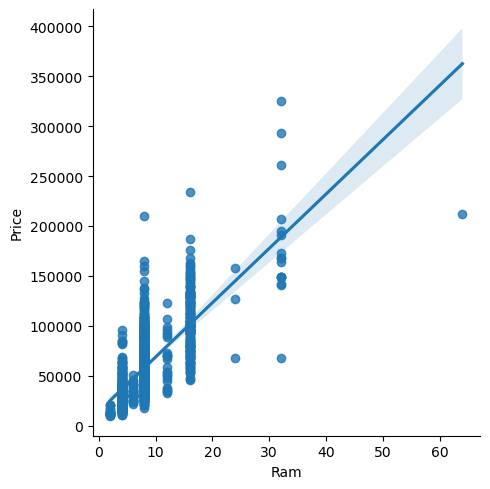

In [32]:
sns.lmplot(data=df,x='Ram',y='Price');

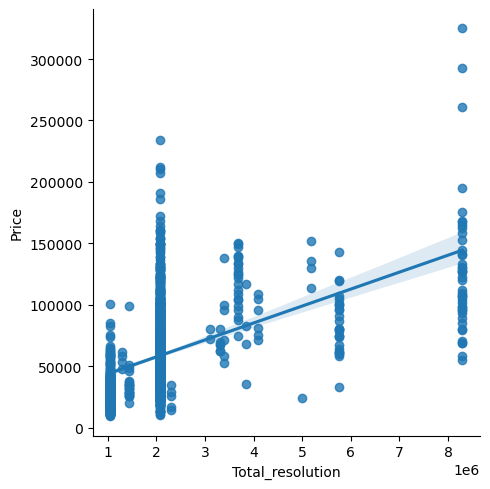

In [33]:
sns.lmplot(data=df,x='Total_resolution',y='Price');

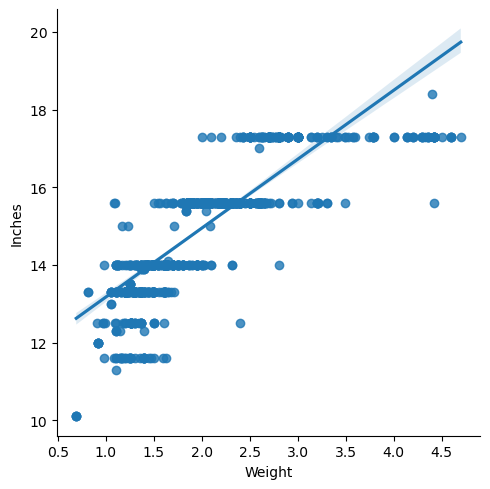

In [34]:
sns.lmplot(data=df,x='Weight',y='Inches');

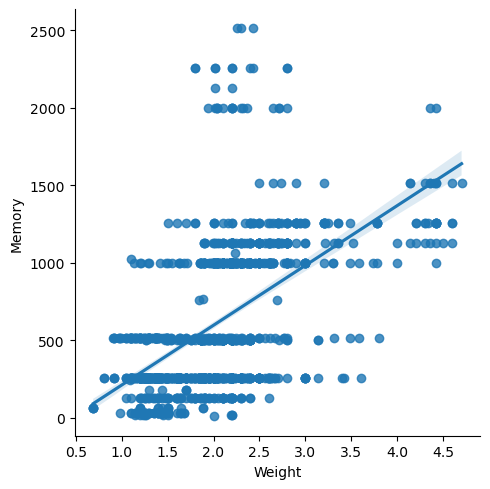

In [35]:
sns.lmplot(data=df,x='Weight',y='Memory');

## Target - Feature Relationship (Category)

In [36]:
def target_feature(data, target):
    for column in data.select_dtypes('object').columns:
        grouped_data = data.groupby(column)[target].mean().reset_index().sort_values(by=target, ascending=True)
        sns.barplot(data=grouped_data, x=column, y=target)
        plt.xticks(rotation=90)
        plt.show()

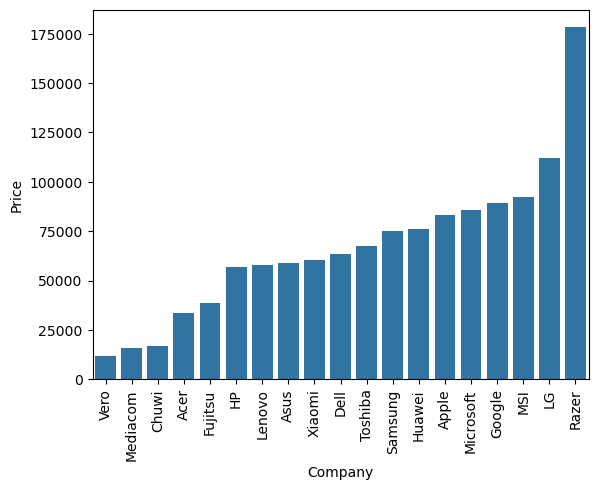

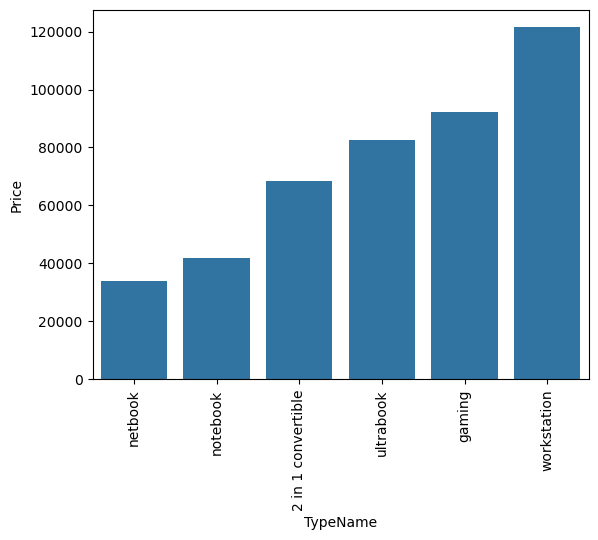

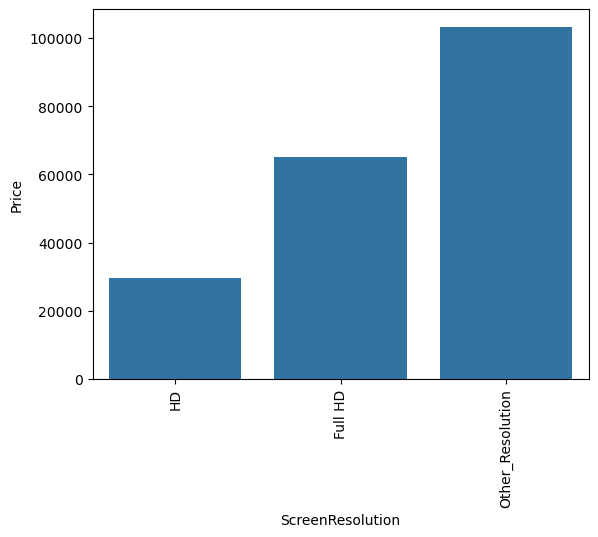

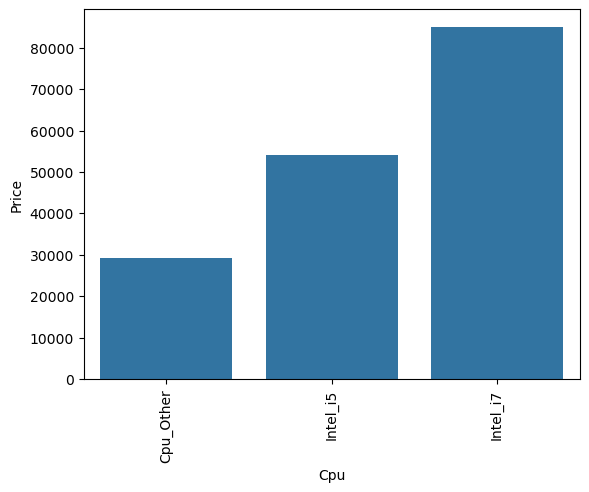

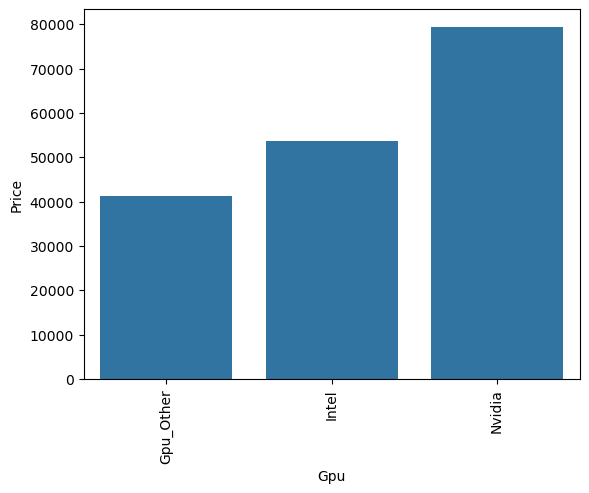

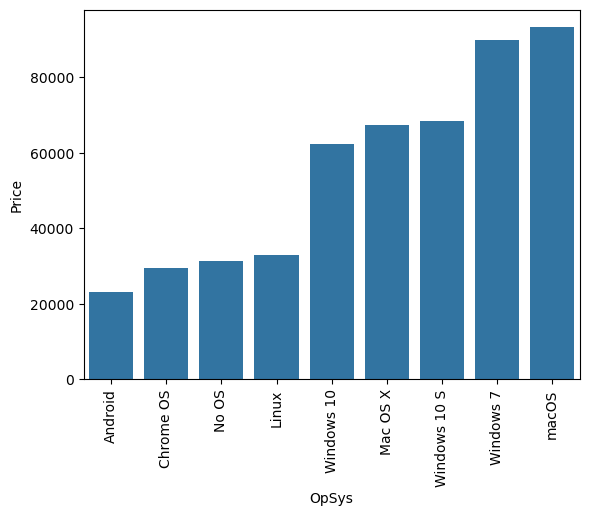

In [37]:
target_feature(df,'Price')

## Feature - Target  Relationship (Numeric)

In [38]:
def feature_target_num (data,target):
    for columns in data.select_dtypes(int).columns:
        group = df.groupby(columns)[target].mean().reset_index().sort_values(by=target,ascending=True)
        sns.boxplot(data=data,x=columns,y=target)
        plt.xticks(rotation=90)
        plt.show()

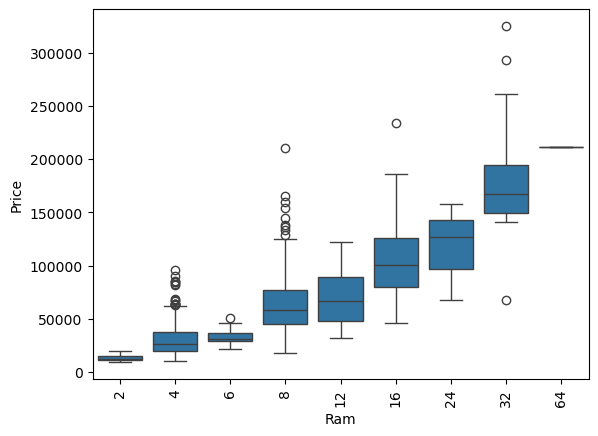

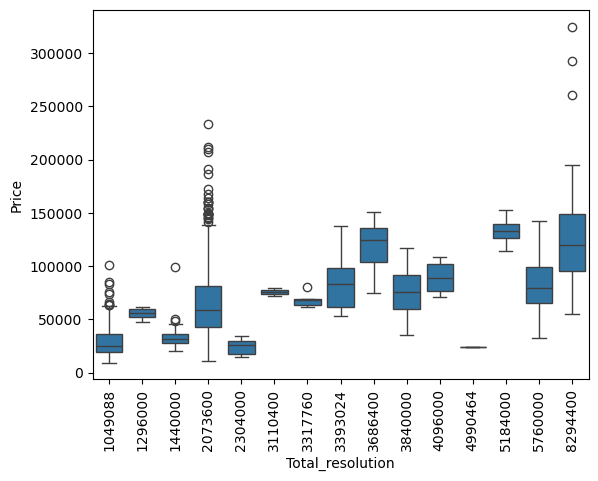

In [39]:
feature_target_num(df,'Price')

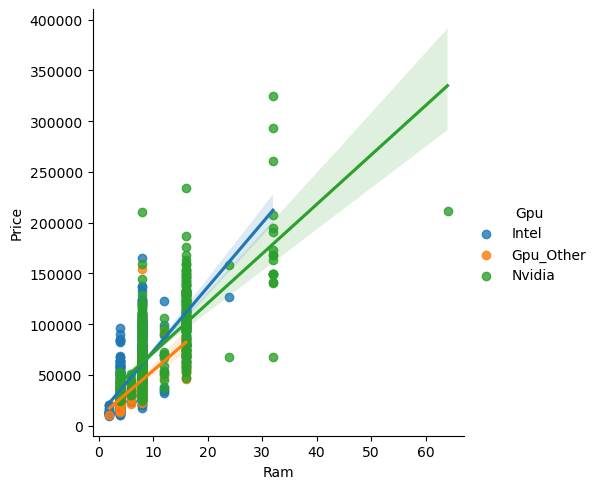

In [40]:
## Checking if thre's huge Scopes so we can create a col to explaibn the variance and avoid Multicolinary issues
sns.lmplot(data=df,x='Ram',y='Price',hue='Gpu');

## Feature Engineering

###### We have already applied some Binning, Mapping but 
###### we will try to add Binary is possible, dummies of couse and due to linearity yeap Math calculations

In [41]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Total_resolution
0,Apple,ultrabook,13.3,Other_Resolution,Intel_i5,8,128.0,Intel,macOS,1.37,71378.6832,4096000
1,Apple,ultrabook,13.3,Other_Resolution,Intel_i5,8,128.0,Intel,macOS,1.34,47895.5232,1296000
2,HP,notebook,15.6,Full HD,Intel_i5,8,256.0,Intel,No OS,1.86,30636.0000,2073600
3,Apple,ultrabook,15.4,Other_Resolution,Intel_i7,16,512.0,Gpu_Other,macOS,1.83,135195.3360,5184000
4,Apple,ultrabook,13.3,Other_Resolution,Intel_i5,8,256.0,Intel,macOS,1.37,96095.8080,4096000


In [42]:
df['Company'].value_counts(normalize=True).round(2)

Company
Dell         0.23
Lenovo       0.23
HP           0.21
Asus         0.12
Acer         0.08
MSI          0.04
Toshiba      0.04
Apple        0.02
Samsung      0.01
Razer        0.01
Mediacom     0.01
Microsoft    0.00
Xiaomi       0.00
Vero         0.00
Chuwi        0.00
Google       0.00
Fujitsu      0.00
LG           0.00
Huawei       0.00
Name: proportion, dtype: float64

In [43]:
df['OpSys']=np.where(df['OpSys']=='Windows 10',1,0)
df['OpSys'].value_counts()

OpSys
1    1072
0     231
Name: count, dtype: int64

In [44]:
df = df.drop('OpSys',axis=1)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price,Total_resolution
0,Apple,ultrabook,13.3,Other_Resolution,Intel_i5,8,128.0,Intel,1.37,71378.6832,4096000
1,Apple,ultrabook,13.3,Other_Resolution,Intel_i5,8,128.0,Intel,1.34,47895.5232,1296000
2,HP,notebook,15.6,Full HD,Intel_i5,8,256.0,Intel,1.86,30636.0000,2073600
3,Apple,ultrabook,15.4,Other_Resolution,Intel_i7,16,512.0,Gpu_Other,1.83,135195.3360,5184000
4,Apple,ultrabook,13.3,Other_Resolution,Intel_i5,8,256.0,Intel,1.37,96095.8080,4096000


In [48]:
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [62]:

df_eng = df.assign(
    Company=np.where(df['Company'].isin(['Dell','Lenovo','HP']),1,0),
    TypeName=np.where(df['TypeName']=='notebook',1,0),
    Inches=np.where(df['Inches']==15.6,1,0),
    Ram_8_Flag=np.where(df['Ram']==8,1,0),
    Ram_2 = df['Ram']**2
)
df_eng=pd.get_dummies(df_eng,drop_first=True).astype(int)

In [63]:
df_eng.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Price,Total_resolution,Ram_8_Flag,Ram_2,ScreenResolution_HD,ScreenResolution_Other_Resolution,Cpu_Intel_i5,Cpu_Intel_i7,Gpu_Intel,Gpu_Nvidia
0,0,0,0,8,128,1,71378,4096000,1,64,0,1,1,0,1,0
1,0,0,0,8,128,1,47895,1296000,1,64,0,1,1,0,1,0
2,1,1,1,8,256,1,30636,2073600,1,64,0,0,1,0,1,0
3,0,0,0,16,512,1,135195,5184000,0,256,0,1,0,1,0,0
4,0,0,0,8,256,1,96095,4096000,1,64,0,1,1,0,1,0


In [64]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Company                            1303 non-null   int32
 1   TypeName                           1303 non-null   int32
 2   Inches                             1303 non-null   int32
 3   Ram                                1303 non-null   int32
 4   Memory                             1303 non-null   int32
 5   Weight                             1303 non-null   int32
 6   Price                              1303 non-null   int32
 7   Total_resolution                   1303 non-null   int32
 8   Ram_8_Flag                         1303 non-null   int32
 9   Ram_2                              1303 non-null   int32
 10  ScreenResolution_HD                1303 non-null   int32
 11  ScreenResolution_Other_Resolution  1303 non-null   int32
 12  Cpu_Intel_i5             

### Standarization

1. Feature engineering
2. Splitting Data
3. Standarization below

In [65]:
# Initial Model
# Test Split

# Sample
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

x = sm.add_constant(df_eng.drop('Price',axis=1))
y  = np.log(df_eng['Price']) # Reduce normality

x, x_test, y, y_test = train_test_split(x, y, test_size=.2, random_state=12345)

In [66]:
#Sample Cross Validation

from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae



kf = KFold(n_splits=5, shuffle=True, random_state=2023)

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop through each fold in X and y
for train_ind, val_ind in kf.split(x, y):
    # Subset data based on CV folds
    x_train, y_train = x.iloc[train_ind], y.iloc[train_ind]
    x_val, y_val = x.iloc[val_ind], y.iloc[val_ind]
    # Fit the Model on fold's training data
    model = sm.OLS(y_train, x_train).fit()
    # Append Validation score to list 
    cv_lm_r2s.append(r2(y_val, model.predict(x_val),))
    cv_lm_mae.append(mae(y_val, model.predict(x_val),))

print("All Validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross Val R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All Validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross Val MAEs: {round(np.mean(cv_lm_mae), 3)} +- {round(np.std(cv_lm_mae), 3)}")


All Validation R2s:  [0.772, 0.762, 0.763, 0.801, 0.753]
Cross Val R2s: 0.77 +- 0.016
All Validation MAEs:  [0.235, 0.24, 0.228, 0.226, 0.235]
Cross Val MAEs: 0.233 +- 0.005


In [67]:
final_model = sm.OLS(y, x).fit()

final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     245.4
Date:                Wed, 12 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:50:04   Log-Likelihood:                -188.69
No. Observations:                1042   AIC:                             409.4
Df Residuals:                    1026   BIC:                             488.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 9.9798      0.057    174.011      0.000       9.867      10.092
Company                               0.0942      0.020      4.641      0.000       0.054       0.134
TypeName                             -0.1983      0.024     -8.354      0.000      -0.245      -0.152
Inches                               -0.1399      0.021     -6.530      0.000      -0.182      -0.098
Ram                                   0.0681      0.005     13.484      0.000       0.058       0.078
Memory                            -4.153e-05   2.44e-05     -1.702      0.089   -8.94e-05    6.36e-06
Weight                                0.0282      0.018      1.593      0.112      -0.007       0.063
Total_resolution                   2.653e-08   1.36e-08      1.953      0.051   -1.28e-10    5.32e-08
Ram_8_Flag                            0.0818      0.021      3.844      0.000       0.040       0.124
Ram_2                                -0.0007      0.000     -6.063      0.000      -0.001      -0.000
ScreenResolution_HD                  -0.1543      0.029     -5.270      0.000      -0.212      -0.097
ScreenResolution_Other_Resolution     0.1392      0.059      2.349      0.019       0.023       0.256
Cpu_Intel_i5                          0.4076      0.028     14.360      0.000       0.352       0.463
Cpu_Intel_i7                          0.4756      0.033     14.500      0.000       0.411       0.540
Gpu_Intel                             0.0276      0.030      0.918      0.359      -0.031       0.086
Gpu_Nvidia                            0.0549      0.033      1.659      0.097      -0.010       0.120
==============================================================================
Omnibus:                        9.200   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               10.326
Skew:                           0.156   Prob(JB):                      0.00572
Kurtosis:                       3.375   Cond. No.                     1.95e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Assumtions Test

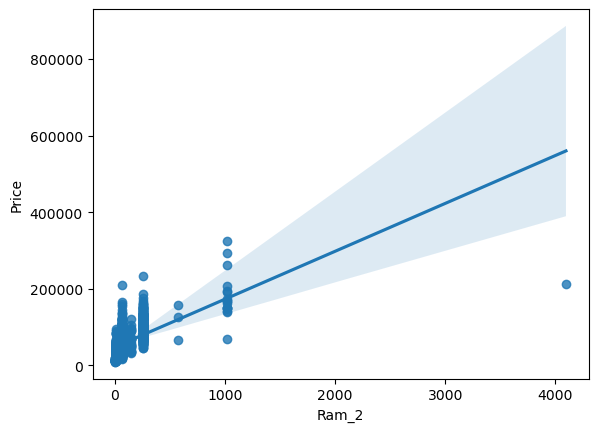

In [69]:
# Linearity

#Check U-Shape

sns.regplot(df_eng,x='Ram_2',y='Price');

#Independence of Errors
#Check Dubin Watson between 1.5-2.5

Durbin-Watson:	2.041 Fine

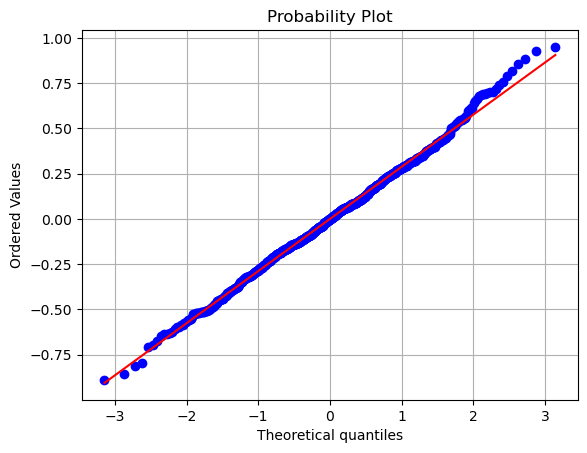

In [70]:
# Normality of Errors
#Check residuals on stats.probplot

import scipy.stats as stats
stats.probplot(model.resid,dist='norm',plot=plt)
plt.grid(True);
#range from -2 to +2 before begins to go up

In [71]:
# No Perfect Multicolinarity

#IF vif > 5 then Remove highly correlated features

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.api as sm

variables = sm.OLS(y,x).exog

pd.Series([vif(variables,i) for i in range (variables.shape[1])],index=x.columns)

const                                40.125522
Company                               1.123658
TypeName                              1.693406
Inches                                1.397438
Ram                                   8.095159
Memory                                1.627119
Weight                                1.889659
Total_resolution                      4.540020
Ram_8_Flag                            1.377915
Ram_2                                 5.484844
ScreenResolution_HD                   1.953513
ScreenResolution_Other_Resolution     3.850164
Cpu_Intel_i5                          2.137244
Cpu_Intel_i7                          3.162297
Gpu_Intel                             2.724091
Gpu_Nvidia                            2.868272
dtype: float64

##### Since Ram, Ram_2 are parte of the same Feature they should be atreated as one here we will look at 
##### "Original columns" Meaning if  Weight and Ram were > 5 then we may need to drop one of them 
#### Here we are good to go!

<Axes: ylabel='None'>

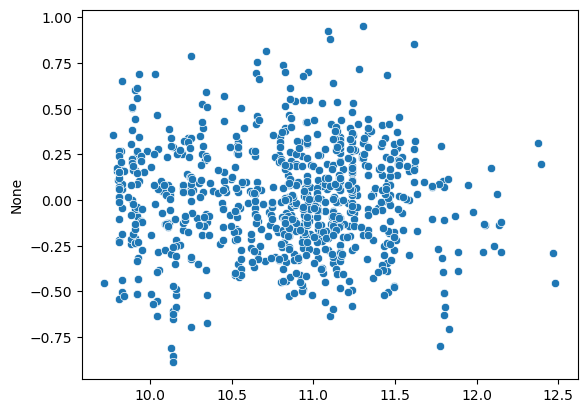

In [73]:
# Equal Variance of Errors
#Errors have a cone shape
#Errors need to be spred even acrros the X axis

sns.scatterplot(x=model.predict(),y=model.resid);

#we already added np.log() to y so no Cone shape here

In [74]:
#Outliers & Influence

#We will check outliers that change influence our model, changes its shape when we plot sns.regplot()

#Small data sets usually get affected by this

influence = model.get_influence()
inf_summary_df = influence.summary_frame()
inf_summary_df["cooks_d"].sort_values(ascending=False).head()


#IF cooks_d > 0.05 check possible outliers influence and between 0.5 and 1 Warning zone still ok but still check

1066    0.519866
610     0.050140
911     0.031761
204     0.019549
435     0.016887
Name: cooks_d, dtype: float64

In [75]:
# Checking Original dataset both df and df_eng share the same index
df.iloc[1066]

# 64GB RAM 1 TB storage intel i7 so makes sence it's expensive 

Company                 Asus
TypeName              gaming
Inches                  17.3
ScreenResolution     Full HD
Cpu                 Intel_i7
Ram                       64
Memory                1000.0
Gpu                   Nvidia
Weight                  3.58
Price               211788.0
Total_resolution     2073600
Name: 1066, dtype: object

In [76]:
df.iloc[610]

# 32GB RAM 1 TB storage cpu Probabli AMD 5 or soemthing  simlar so makes sence it's expensive 

Company                       Lenovo
TypeName                    notebook
Inches                          15.6
ScreenResolution    Other_Resolution
Cpu                        Cpu_Other
Ram                               32
Memory                        1000.0
Gpu                           Nvidia
Weight                           2.5
Price                      261018.72
Total_resolution             8294400
Name: 610, dtype: object

In [78]:
# After Assumtions Analysis
# With Cross Validation
from sklearn.preprocessing import StandardScaler


# Splitting Data
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=2024)

# Standardization
std = StandardScaler()
x_tr = std.fit_transform(x_train.values)
x_val = std.transform(x_valid.values)
x_te = std.transform(x_test.values)

In [79]:
pd.DataFrame(x_tr, columns=x.columns).head()

,const,Company,TypeName,Inches,Ram,Memory,Weight,Total_resolution,Ram_8_Flag,Ram_2,ScreenResolution_HD,ScreenResolution_Other_Resolution,Cpu_Intel_i5,Cpu_Intel_i7,Gpu_Intel,Gpu_Nvidia
0,0.0,0.702359,0.868940,-1.029896,-0.072511,-0.764202,-0.895034,-0.077615,1.032539,-0.167028,-0.574886,-0.335463,1.432055,-0.819986,0.905822,-0.668054
1,0.0,0.702359,-1.150828,-1.029896,-0.072511,-0.216657,-0.895034,-0.077615,1.032539,-0.167028,-0.574886,-0.335463,-0.698297,1.219533,0.905822,-0.668054
2,0.0,-1.423774,-1.150828,-1.029896,1.489727,1.374648,0.570420,-0.077615,-0.968486,0.825766,-0.574886,-0.335463,-0.698297,1.219533,-1.103970,1.496885
3,0.0,-1.423774,-1.150828,-1.029896,1.489727,1.374648,0.570420,-0.077615,-0.968486,0.825766,-0.574886,-0.335463,-0.698297,1.219533,-1.103970,1.496885
4,0.0,0.702359,0.868940,0.970972,-0.853630,0.827103,-0.895034,-0.808758,-0.968486,-0.415227,1.739475,-0.335463,-0.698297,-0.819986,0.905822,-0.668054


In [80]:
model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     245.4
Date:                Wed, 12 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:08:40   Log-Likelihood:                -188.69
No. Observations:                1042   AIC:                             409.4
Df Residuals:                    1026   BIC:                             488.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 9.9798      0.057    174.011      0.000       9.867      10.092
Company                               0.0942      0.020      4.641      0.000       0.054       0.134
TypeName                             -0.1983      0.024     -8.354      0.000      -0.245      -0.152
Inches                               -0.1399      0.021     -6.530      0.000      -0.182      -0.098
Ram                                   0.0681      0.005     13.484      0.000       0.058       0.078
Memory                            -4.153e-05   2.44e-05     -1.702      0.089   -8.94e-05    6.36e-06
Weight                                0.0282      0.018      1.593      0.112      -0.007       0.063
Total_resolution                   2.653e-08   1.36e-08      1.953      0.051   -1.28e-10    5.32e-08
Ram_8_Flag                            0.0818      0.021      3.844      0.000       0.040       0.124
Ram_2                                -0.0007      0.000     -6.063      0.000      -0.001      -0.000
ScreenResolution_HD                  -0.1543      0.029     -5.270      0.000      -0.212      -0.097
ScreenResolution_Other_Resolution     0.1392      0.059      2.349      0.019       0.023       0.256
Cpu_Intel_i5                          0.4076      0.028     14.360      0.000       0.352       0.463
Cpu_Intel_i7                          0.4756      0.033     14.500      0.000       0.411       0.540
Gpu_Intel                             0.0276      0.030      0.918      0.359      -0.031       0.086
Gpu_Nvidia                            0.0549      0.033      1.659      0.097      -0.010       0.120
==============================================================================
Omnibus:                        9.200   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               10.326
Skew:                           0.156   Prob(JB):                      0.00572
Kurtosis:                       3.375   Cond. No.                     1.95e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
print(f"Training R2: {r2(y, model.predict(x))}")
print(f"Training MAE: {mae(y, model.predict(x))}")
print(' ')
print(f"Test R2: {r2(y_test, model.predict(x_test))}")
print(f"Test MAE: {mae(y_test, model.predict(x_test))}")

Training R2: 0.782029334539501
Training MAE: 0.22821108393368483
 
Test R2: 0.7472468575559301
Test MAE: 0.25835501884774426


In [82]:
# RidgeCV
# Fix Multicollinary issues if don't wanna drop any feature

# Remember standarization 3 steps before applyitng this 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

std= StandardScaler()
x_tr = std.fit_transform(x.values)
x_te = std.transform(x_test.values)


n_alphas = 200
alphas = 10 ** np.linspace(-3, 3, n_alphas)

ridge_model = RidgeCV(alphas=alphas, cv=5)

ridge_model.fit(x_tr, y)
print(f"Cross Val R2: {ridge_model.score(x_tr, y)}")
print(f"Cross Val MAE: {mae(np.exp(y), np.exp(ridge_model.predict(x_tr)))}")
print(f"Alpha: {ridge_model.alpha_}")
print('')
print(f"Model Score:  {ridge_model.score(x_te, y_test)} ")

Cross Val R2: 0.7819533007894179
Cross Val MAE: 13436.3982360739
Alpha: 5.111433483440165

Model Score:  0.7471189634789053 


In [83]:
list(zip(x.columns, ridge_model.coef_))

[('const', 0.0),
 ('Company', 0.044441356803929626),
 ('TypeName', -0.09949748349897083),
 ('Inches', -0.06986464448896304),
 ('Ram', 0.3343023970213607),
 ('Memory', -0.018149152349579718),
 ('Weight', 0.0198306910366614),
 ('Total_resolution', 0.03872403383059451),
 ('Ram_8_Flag', 0.0418167745985813),
 ('Ram_2', -0.117824038193345),
 ('ScreenResolution_HD', -0.06820951945280107),
 ('ScreenResolution_Other_Resolution', 0.04159409757811642),
 ('Cpu_Intel_i5', 0.18812550755045918),
 ('Cpu_Intel_i7', 0.23235816675143486),
 ('Gpu_Intel', 0.013502376448606152),
 ('Gpu_Nvidia', 0.026051084083744534)]

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error

X = sm.add_constant(df_eng.drop('Price',axis=1))
y  = np.log(df_eng['Price']) # Reduce normality
# Assuming X_train, y_train are your training features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# New hyperparameters to try
rf_model = RandomForestRegressor(
    n_estimators=500,               # Decreased number of trees
    min_samples_split=10,            # Increased min_samples_split
    min_samples_leaf=5,              # Increased min_samples_leaf
    max_features='sqrt',             # Default is fine
    max_depth=6,                     # Decreased max_depth
    bootstrap=True,
    random_state=42
)

# Fit the model
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = rf_model.predict(X_test)
print(f"Model R² on Test Set: {rf_model.score(X_test, y_test)}")
print(f"MAE on Test Set: {mean_absolute_error(y_test, y_pred)}")

# Cross-validation score
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Cross-Validation R²: {cv_scores.mean()}")



Model R² on Test Set: 0.8052235238451823
MAE on Test Set: 0.20604692540060976
Cross-Validation R²: 0.8099238344012916


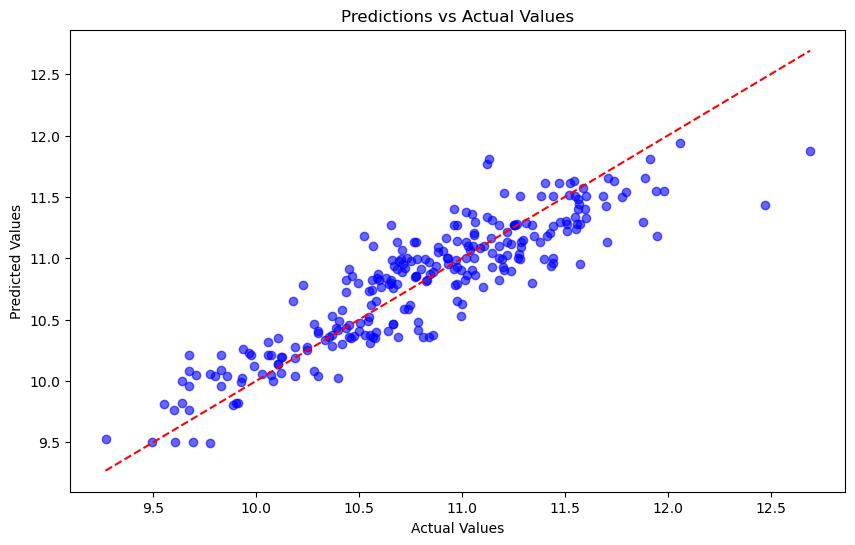

In [91]:
import matplotlib.pyplot as plt

# Assuming you have the predictions in y_pred and actual values in y_test

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')
plt.show()
